# Quiz 2

Kindly provide both the notebook file and its corresponding PDF format for submission on iLearn. Do not zip the files. Failure to comply with this instruction may lead to deductions in marks.

## Question 1 [10 pts]
Be brief and to the point while answering the following questions:

- a [3 pts] When comparing features between two images, what methods can be employed to enhance the sum of squared distance (SSD) measure, thereby reducing ambiguity and improving accuracy in the matching process?
- b [3 pts]  Why is SIFT descriptor rotation invariant
- c [4 pts] Explain briefly how RANSAC helps in finding the homography between two images?


<span style="color:red">Write Your answers for Question 1 in this cell:</span>

**a**

When using SSD, sometimes we can get multiple matches with similar SSD, but they would still be incorrect. To enhance the SSD measure, we can employ a ratio test that would allow us to then pick the matches with the highest confidence. 


**b**

SIFT is rotation invariant since it works on identifying the keypoints. The descriptor is the neighborhood around the keypoint that allows us to identify the keypoint correctly. Even with rotation, the descriptor or the pixels around the keypoint would remain similar, meaning that we would still be able to find the same points, making SIFT rotation invariant.

**c**

RANSAC allows us run the model multiple times where we find H and then score the model based on the number of inliers that we are able to observe. By doing so, RANSAC is allowing you to correctly identify the keypoints that match between the images and slightly eliminates the chances of incorrect matches since you would use the model with the highest score/number of inliers.


## Question 2 [10 pts]
You are provided an image (```billboard.jpg```) containing an image of a billboard. The coordinates of the billboard within the image are as follows:
```
pts = [(184, 298),  # top left
       (564, 227),  # top right
       (178, 447),  # bottom left
       (570, 405)]  # bootom right
```
Write Python code to put your name onto the billboard, with the text appearing in green against a white background.

Some of the OpenCV functions you will need in this quiz are:
```
cv2.getPerspectiveTransform # to obtain the Homography matrix
cv2.warpPerspective # To apply homography to the image
cv2.putText # to put text on the image
```
Follow the steps below to get full credit.

In [1]:
import cv2
from matplotlib import pyplot as plt 
import numpy as np

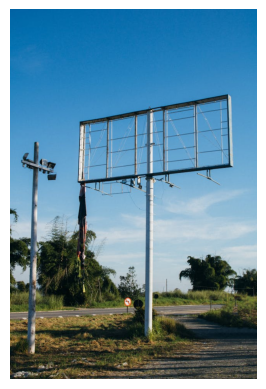

In [2]:
# Load the image
image = cv2.imread('./billboard.jpg')
billboard_pts = [(184, 298),  # top left
                 (564, 227),  # top right
                 (178, 447),  # bottom left
                 (570, 405)]  # bootom right

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Step 1 expected output


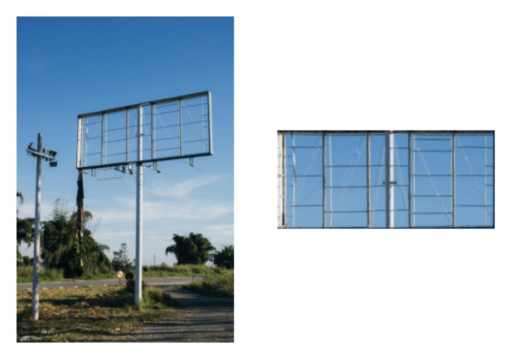

Step 2 expected output


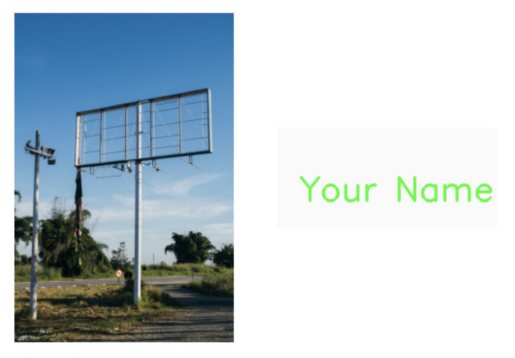

Step 3 expected output


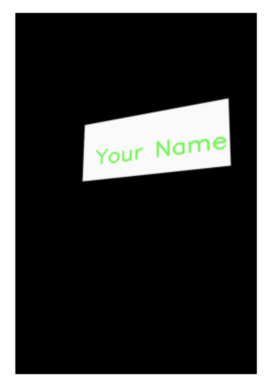

Step 4 expected output


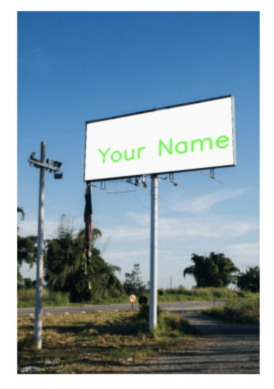

(<matplotlib.image.AxesImage at 0x296b6c5b890>,
 (-0.5, 571.5, 829.5, -0.5),
 None)

In [3]:
## Follow these steps to get full credit
## Step 1: [4 pts] Find and Apply homography matrix that transforms the billboard to a frontal view
print('Step 1 expected output')
plt.imshow(cv2.cvtColor(cv2.imread('./step1_output.jpg'), cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.show()

## Step 2: [2 pts] Add your name in green to the billboard and white background
print('Step 2 expected output')
plt.imshow(cv2.cvtColor(cv2.imread('./step2_output.jpg'), cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.show()

## Step 3: [2 pts] Apply homography to transform the billboard back
print('Step 3 expected output')
plt.imshow(cv2.cvtColor(cv2.imread('./step3_output.jpg'), cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.show()

## Step 4: [2 pts] Combine the output of the previous step with the original image
print('Step 4 expected output')
plt.imshow(cv2.cvtColor(cv2.imread('./step4_output.jpg'), cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.show() 

Step 1: [4 pts] Find and Apply homography matrix that transforms the billboard to a frontal view

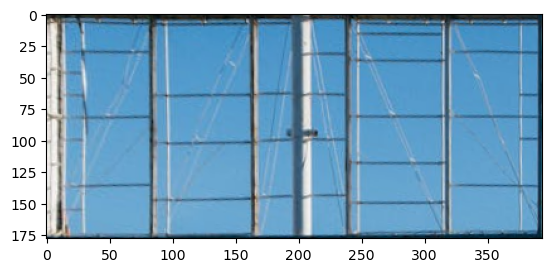

In [18]:
# Convert the billboard points into a numpy array
input_pts = np.array(billboard_pts , dtype=np.float32)

# Obtain the width and height of the billboard
width = (np.linalg.norm(input_pts[0]-input_pts[1]), np.linalg.norm(input_pts[2]-input_pts[3]))      
height = (np.linalg.norm(input_pts[0]-input_pts[2]), np.linalg.norm(input_pts[1]-input_pts[3]))  

width = int(np.max(width))
height = int(np.max(height))

# Define the output points
output_pts = np.array([(0, 0),
          (width-1, 0),
          (0, height-1),
          (width-1,height-1)], np.float32) 

# Get the homography matrix
H = cv2.getPerspectiveTransform(input_pts, output_pts)  

# Apply the matrix to the billboard
output_image = cv2.warpPerspective(image, H, (width, height), flags=cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))


Step 2: [2 pts] Add your name in green to the billboard and white background

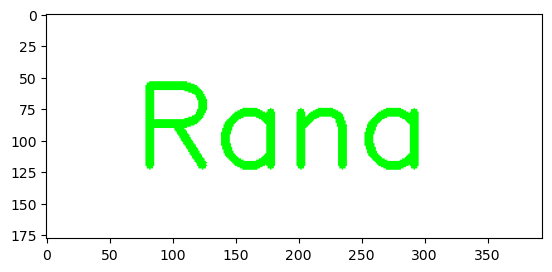

In [36]:
# Convert the image to all white 
new_output = output_image.copy()
for x in range(0,new_output.shape[0]):
    for y in range(0,new_output.shape[1]):
            new_output[x,y,:]=[255,255,255]

plt.imshow(new_output)

# Add your name to the billboard
window_name = 'Image' 
text = 'Rana'                           # text
font = cv2.FONT_HERSHEY_SIMPLEX         # font
org = (70,120) 
fontScale = 3
color = (0, 255, 0)                     # Green in RGB
thickness = 5
   
named_image = cv2.putText(new_output, text, org, font, fontScale, color, thickness, cv2.FILLED, bottomLeftOrigin=False)  # Using cv2.putText() method 
  
# Displaying the image 
plt.imshow(named_image)

Step 3: [2 pts] Apply homography to transform the billboard back

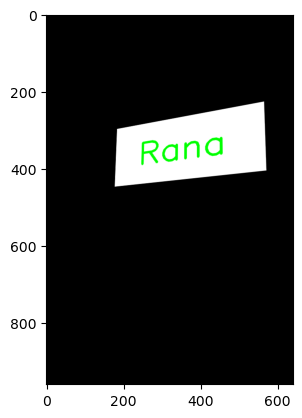

In [37]:
# Obtain the height and width of the original image
height, width = image.shape[:2]

# Apply homography to transform back
new_billboard = cv2.warpPerspective(named_image, np.linalg.inv(H), (width, height), flags=cv2.INTER_LINEAR)

plt.imshow(new_billboard)

Step 4: [2 pts] Combine the output of the previous step with the original image

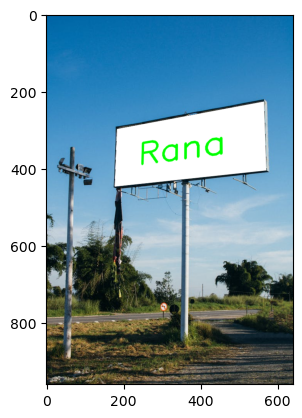

In [38]:
# Replace the black pixels with the original image
final_image = new_billboard.copy()
for x in range(0,final_image.shape[0]):
    for y in range(0,final_image.shape[1]):
        if((final_image[x,y,:]==[0,0,0]).all()):
            final_image[x,y,:] = image[x,y,:]

plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))